In [11]:
!pip install scikit-learn pandas matplotlib seaborn

Mounting Google Drive

In [2]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/My Drive/"
os.chdir(path)

execution_dir = os.path.join(os.getcwd(), "Colab Notebooks/Data_Analysis")

print(execution_dir)
os.listdir(execution_dir)

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Data_Analysis


['dataset_for_assignment_2.csv']

Descriptive Statistics

In [4]:
import pandas as pd

data_dir = os.path.join(execution_dir, "dataset_for_assignment_2.csv")

# 加载数据
data = pd.read_csv(data_dir)

# 描述性统计
print(data.describe())

           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.550400   
std    1443.520003    12.160631     42.689317                36.746095   
min       1.000000    18.000000     50.000000                26.000000   
25%    1250.750000    28.000000     89.000000                63.000000   
50%    2500.500000    39.000000    124.000000                89.000000   
75%    3750.250000    49.000000    161.000000               118.000000   
max    5000.000000    59.000000    199.000000               195.000000   

       Calories Burned  
count      5000.000000  
mean        432.316000  
std         187.427426  
min         102.000000  
25%         285.000000  
50%         406.000000  
75%         560.000000  
max         987.000000  


Visualizations

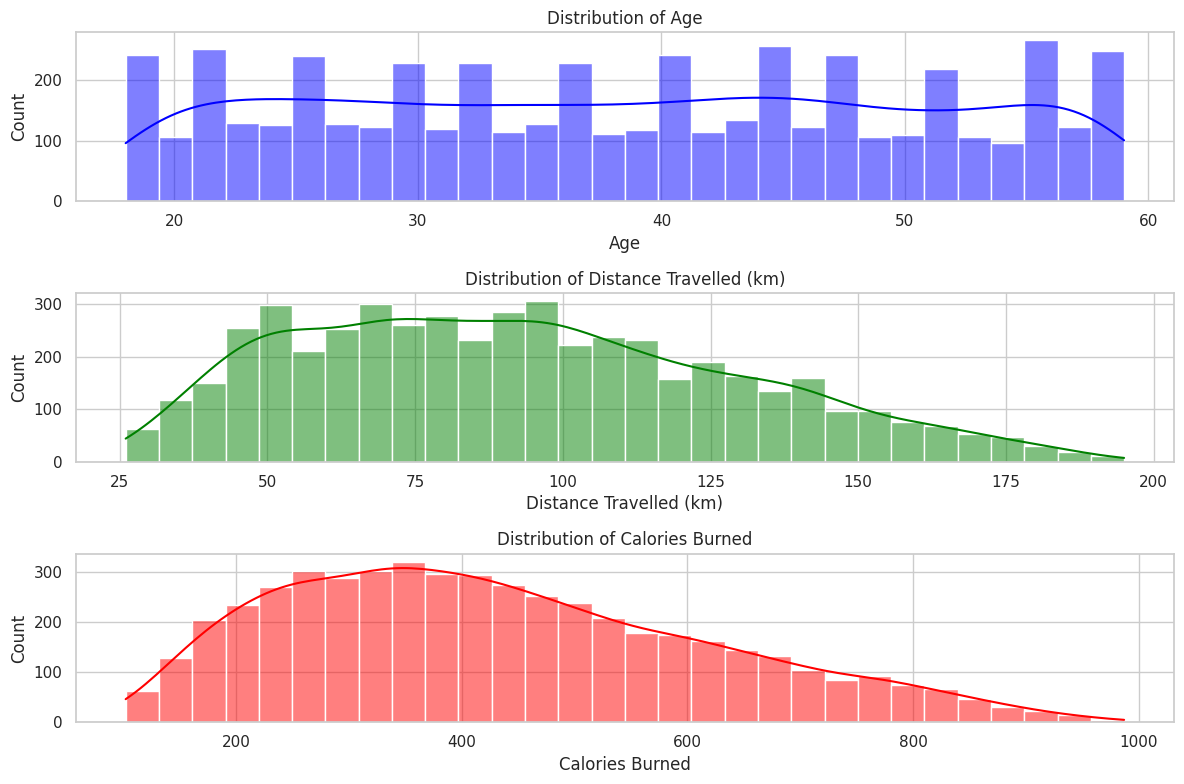

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of plots
sns.set(style="whitegrid")

# Histograms for continuous variables
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')

plt.subplot(3, 1, 2)
sns.histplot(data['Distance Travelled (km)'], bins=30, kde=True, color='green')
plt.title('Distribution of Distance Travelled (km)')

plt.subplot(3, 1, 3)
sns.histplot(data['Calories Burned'], bins=30, kde=True, color='red')
plt.title('Distribution of Calories Burned')

plt.tight_layout()
plt.show()

Correlation Analysis

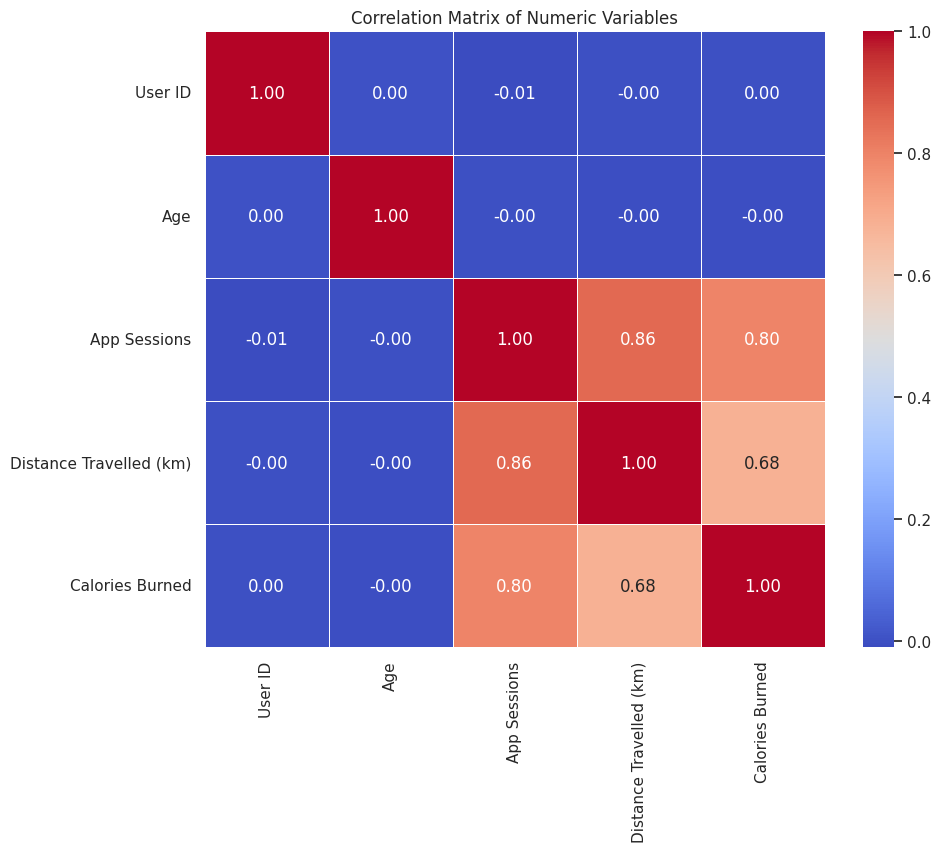

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importing NumPy

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # np.number covers all numeric types

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

For Linear Regression

Linear Regression - Distance Coefficients: [0.99724422]


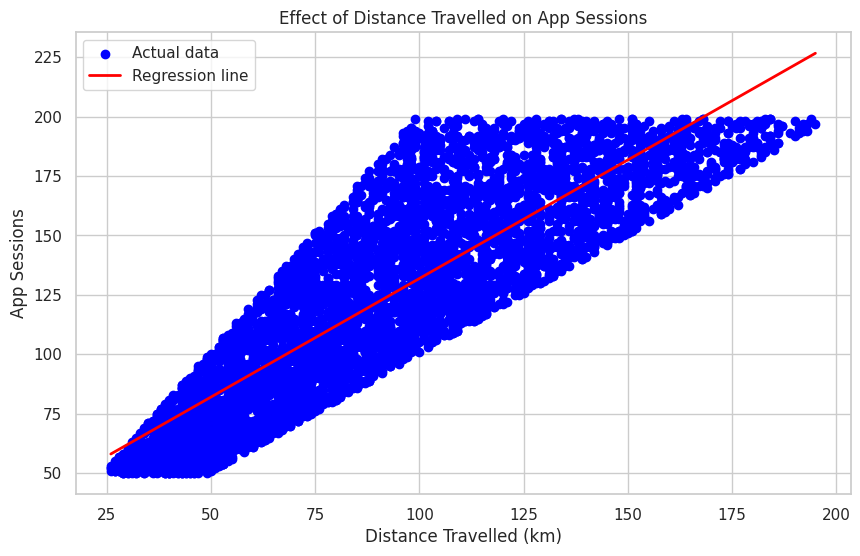

Linear Regression - Calory Coefficients: [0.18105838]


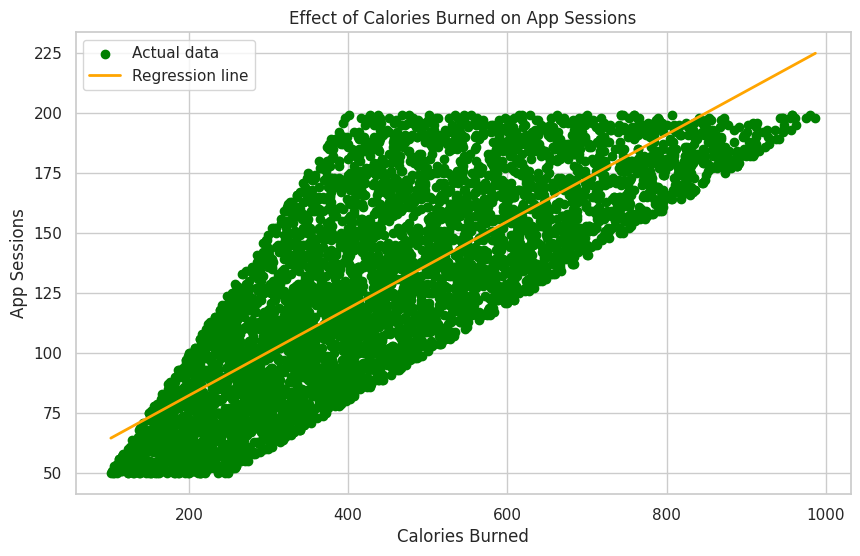

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Response variable
y = data['App Sessions']

# Preparing for 'Distance Travelled (km)'
X_distance = data[['Distance Travelled (km)']]
X_train_dist, X_test_dist, y_train, y_test = train_test_split(X_distance, y, test_size=0.2, random_state=42)

# Linear Regression model for 'Distance Travelled (km)'
model_distance = LinearRegression()
model_distance.fit(X_train_dist, y_train)

# Making predictions, ensuring DataFrame structure
x_range_dist = pd.DataFrame(np.linspace(X_distance.min(), X_distance.max(), 100), columns=['Distance Travelled (km)'])
y_pred_dist = model_distance.predict(x_range_dist)

distance_coefficients = model_distance.coef_
print("Linear Regression - Distance Coefficients:", distance_coefficients)


# Plotting regression for 'Distance Travelled (km)'
plt.figure(figsize=(10, 6))
plt.scatter(X_distance, y, color='blue', label='Actual data')
plt.plot(x_range_dist, y_pred_dist, color='red', linewidth=2, label='Regression line')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('App Sessions')
plt.title('Effect of Distance Travelled on App Sessions')
plt.legend()
plt.show()

# Preparing for 'Calories Burned'
X_calories = data[['Calories Burned']]
X_train_cal, X_test_cal, y_train, y_test = train_test_split(X_calories, y, test_size=0.2, random_state=42)

# Linear Regression model for 'Calories Burned'
model_calories = LinearRegression()
model_calories.fit(X_train_cal, y_train)

# Making predictions, ensuring DataFrame structure
x_range_cal = pd.DataFrame(np.linspace(X_calories.min(), X_calories.max(), 100), columns=['Calories Burned'])
y_pred_cal = model_calories.predict(x_range_cal)

calory_coefficients = model_calories.coef_
print("Linear Regression - Calory Coefficients:", calory_coefficients)

# Plotting regression for 'Calories Burned'
plt.figure(figsize=(10, 6))
plt.scatter(X_calories, y, color='green', label='Actual data')
plt.plot(x_range_cal, y_pred_cal, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Calories Burned')
plt.ylabel('App Sessions')
plt.title('Effect of Calories Burned on App Sessions')
plt.legend()
plt.show()


Evaluate performance for  Linear Regression

In [20]:
# Distance Travelled
mse_dist = mean_squared_error(y_test, model_distance.predict(X_test_dist))
r2_dist = r2_score(y_test, model_distance.predict(X_test_dist))
print("MSE for Distance Travelled (km):", mse_dist)
print("R² for Distance Travelled (km):", r2_dist)

# Calories Burned
mse_cal = mean_squared_error(y_test, model_calories.predict(X_test_cal))
r2_cal = r2_score(y_test, model_calories.predict(X_test_cal))
print("MSE for Calories Burned:", mse_cal)
print("R² for Calories Burned:", r2_cal)


MSE for Distance Travelled (km): 478.9271342790736
R² for Distance Travelled (km): 0.7426846281551751
MSE for Calories Burned: 672.6335628793825
R² for Calories Burned: 0.6386110893295855


For Decision Tree Regressor

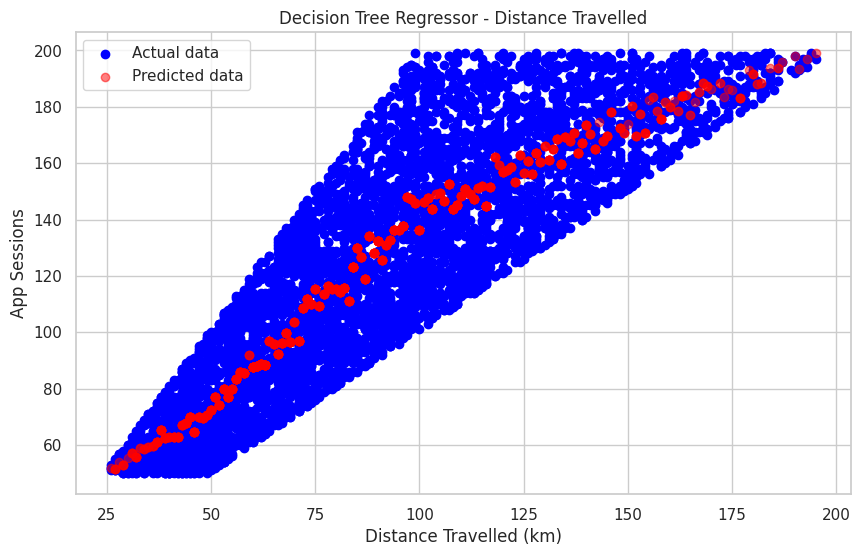

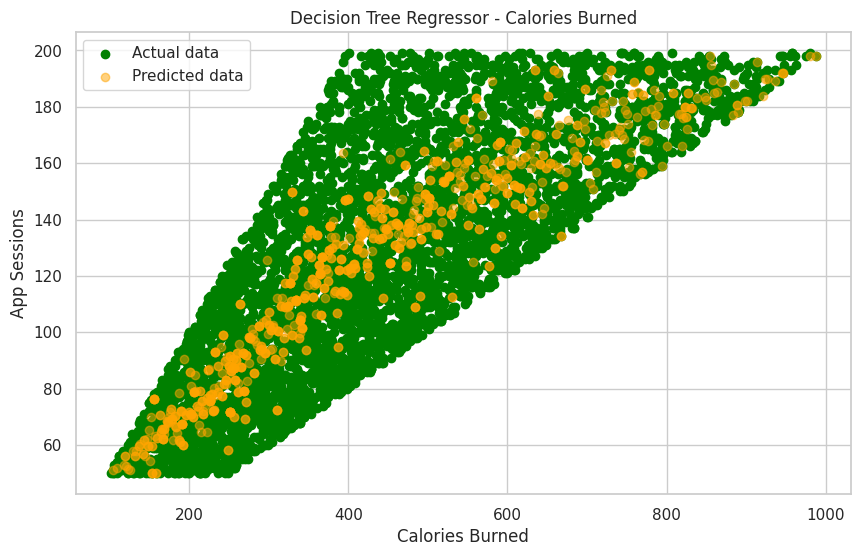

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor for 'Distance Travelled (km)'
dtree_distance = DecisionTreeRegressor(random_state=42)
dtree_distance.fit(X_train_dist, y_train)
y_pred_dtree_dist = dtree_distance.predict(X_test_dist)

# Plotting Decision Tree results
plt.figure(figsize=(10, 6))
plt.scatter(X_distance, y, color='blue', label='Actual data')
plt.scatter(X_test_dist, y_pred_dtree_dist, color='red', label='Predicted data', alpha=0.5)
plt.xlabel('Distance Travelled (km)')
plt.ylabel('App Sessions')
plt.title('Decision Tree Regressor - Distance Travelled')
plt.legend()
plt.show()


# Decision Tree Regressor for 'Calories Burned'
dtree_calories = DecisionTreeRegressor(random_state=42)
dtree_calories.fit(X_train_cal, y_train)

# Predicting and calculating performance
y_pred_dtree_cal = dtree_calories.predict(X_test_cal)

# Plotting Decision Tree results for 'Calories Burned'
plt.figure(figsize=(10, 6))
plt.scatter(X_calories, y, color='green', label='Actual data')
plt.scatter(X_test_cal, y_pred_dtree_cal, color='orange', label='Predicted data', alpha=0.5)
plt.xlabel('Calories Burned')
plt.ylabel('App Sessions')
plt.title('Decision Tree Regressor - Calories Burned')
plt.legend()
plt.show()




Evaluate performance for Decision Tree Regressor

In [25]:
# Distance Travelled

mse_dtree_dist = mean_squared_error(y_test, y_pred_dtree_dist)
r2_dtree_dist = r2_score(y_test, y_pred_dtree_dist)

print(f'Decision Tree - MSE for Distance Travelled (km): {mse_dtree_dist:.2f}')
print(f'Decision Tree - R² for Distance Travelled (km): {r2_dtree_dist:.2f}')



# Calories Burned

mse_dtree_cal = mean_squared_error(y_test, y_pred_dtree_cal)
r2_dtree_cal = r2_score(y_test, y_pred_dtree_cal)

print(f'Decision Tree - MSE for Calories Burned: {mse_dtree_cal:.2f}')
print(f'Decision Tree - R² for Calories Burned: {r2_dtree_cal:.2f}')


Decision Tree - MSE for Distance Travelled (km): 421.29
Decision Tree - R² for Distance Travelled (km): 0.77
Decision Tree - MSE for Calories Burned: 721.75
Decision Tree - R² for Calories Burned: 0.61


For clustering model

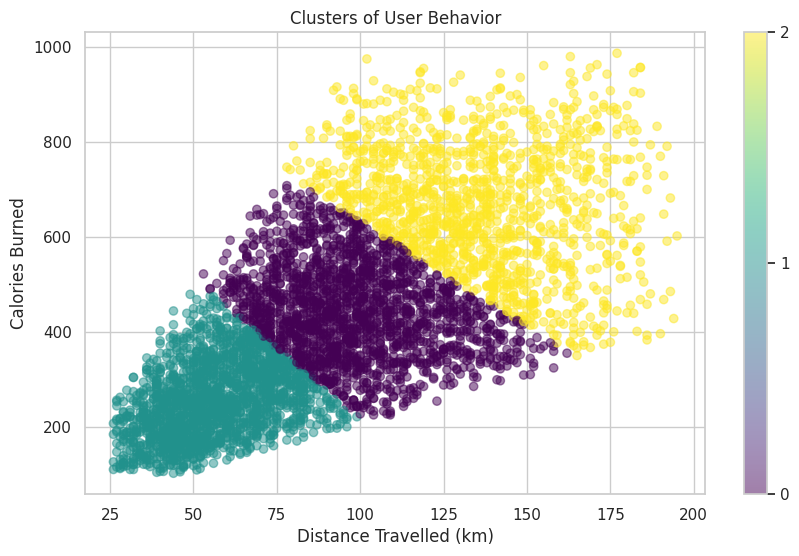

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Selecting features for clustering
features = data[['Distance Travelled (km)', 'Calories Burned']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Performing K-Means clustering
# Explicitly setting n_init to avoid future warnings
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)



# Adding cluster labels to the dataset for visualization
data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance Travelled (km)'], data['Calories Burned'], c=data['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.title('Clusters of User Behavior')
plt.show()

Evaluate clustering performance

In [29]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.40
